In [132]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from bokeh.plotting import figure
from bokeh.charts import TimeSeries
%matplotlib inline

In [135]:
rcParams['figure.figsize'] = (100, 6)

In [37]:
# files
subjects_train = [[{k: 'train/subj%d_series%d_%s.csv' % (i, j, k)
                    for k in ['data', 'events']} 
                   for j in range(1, 9)]
                  for i in range(1, 13)]
subjects_test = [[{k: 'test/subj%d_series%d_%s.csv' % (i, j, k) 
                   for k in ['data', 'events']} 
                  for j in range(9, 11)]
                 for i in range(1, 13)]

In [121]:
electrodes = [
    'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5',
    'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8',
    'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3',
    'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
neighbours = {
    'Fp1': ['F3', 'F7', 'Fz', 'Fp2'],
    'Fp2': ['F4', 'F8', 'Fz', 'Fp1'], 
    'F7': ['FC5', 'F3', 'Fp1'], 
    'F3': ['FC1', 'FC5', 'F7', 'Fz', 'Fp1'],
    'Fz': ['FC1', 'FC2', 'F3', 'F4'],
    'F4': ['FC2', 'FC6', 'F8', 'Fz', 'Fp2'],
    'F8': ['FC6', 'F4', 'Fp2'],
    'FC5': ['F7', 'F3', 'C3', 'T7'],
    'FC1': ['F3', 'Fz', 'Cz', 'C3'],
    'FC2': ['F4', 'Fz', 'Cz', 'C4'],
    'FC6': ['F8', 'F4', 'C4', 'T8'],
    'T7': ['FC5', 'CP5', 'TP9'],
    'C3': ['FC5', 'CP5', 'FC1', 'CP1'],
    'Cz': ['FC1', 'FC2', 'CP1', 'CP2'],
    'C4': ['FC6', 'CP6', 'FC2', 'CP2'],
    'T8': ['FC6', 'CP6', 'TP10'],
    'TP9': ['P7', 'T7'],
    'CP5': ['P7', 'P3', 'C3', 'T7'],
    'CP1': ['P3', 'Pz', 'Cz', 'C3'],
    'CP2': ['P4', 'Pz', 'Cz', 'C4'],
    'CP6': ['P8', 'P4', 'C4', 'T8'],
    'TP10': ['P8', 'T8'],
    'P7': ['CP5', 'TP9', 'PO9', 'P3'],
    'P3': ['CP1', 'CP5', 'Pz', 'O1'],
    'Pz': ['CP1', 'CP2', 'P3', 'P4', 'O1', 'O2'],
    'P4': ['CP2', 'CP6', 'Pz', 'O2'],
    'P8': ['CP6', 'TP10', 'PO10', 'P4'],
    'PO9': ['P7', 'O1'],
    'O1': ['Oz', 'P3', 'PO9'],
    'Oz': ['O1', 'O2', 'Pz'],
    'O2': ['Oz', 'P4', 'PO10'],
    'PO10': ['P8', 'O2']}
mirror_pairs = [
    ['Fp1', 'Fp2'],
    ['F7', 'F8'],
    ['F3', 'F4'],
    ['Fz', 'Fz'],
    ['FC5', 'FC6'],
    ['FC1', 'FC2'],
    ['T7', 'T8'],
    ['C3', 'C4'],
    ['Cz', 'Cz'],
    ['TP9', 'TP10'],
    ['CP5', 'CP6'],
    ['CP1', 'CP2'],
    ['P7', 'P8'],
    ['P3', 'P4'],
    ['Pz', 'Pz'],
    ['PO9', 'PO10'],
    ['O1', 'O2'],
    ['Oz', 'Oz']
]
events = [
    'HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff',
    'Replace', 'BothReleased']

In [43]:
data11 = pd.read_csv(subjects_train[0][0]['data'])
events11 = pd.read_csv(subjects_train[0][0]['events'])

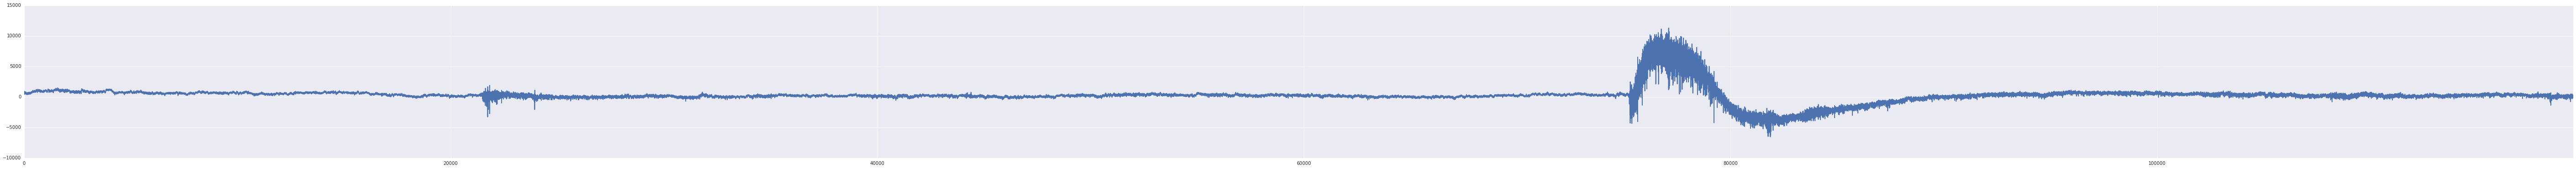

In [146]:
data11.T8.plot()

Fp1 vs Fp2


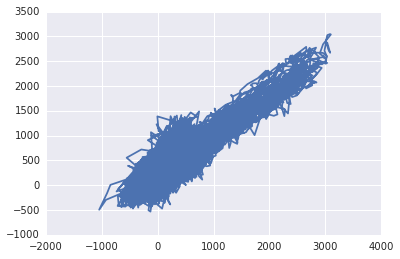

F7 vs F8


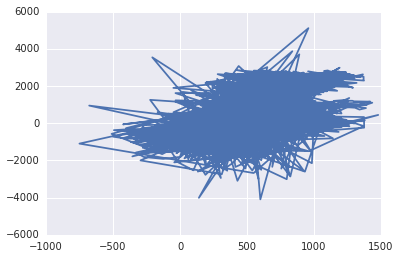

F3 vs F4


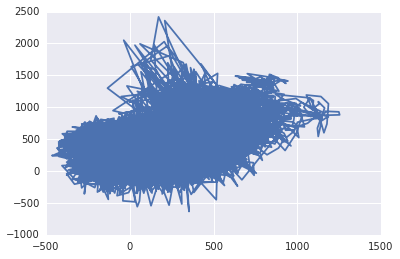

Fz vs Fz


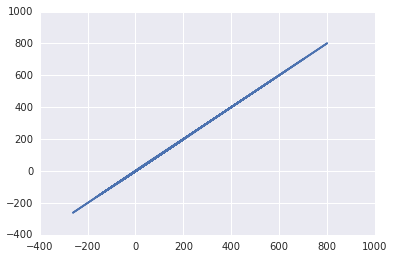

FC5 vs FC6


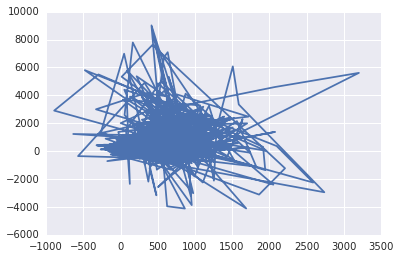

FC1 vs FC2


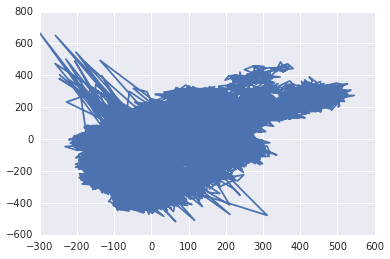

T7 vs T8


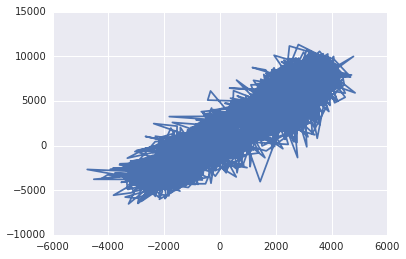

C3 vs C4


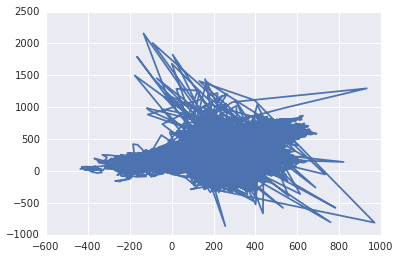

Cz vs Cz


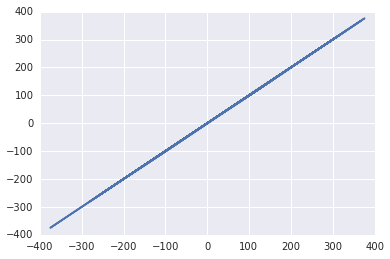

TP9 vs TP10


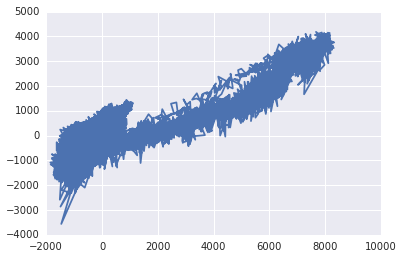

CP5 vs CP6


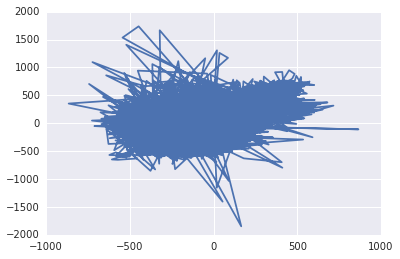

CP1 vs CP2


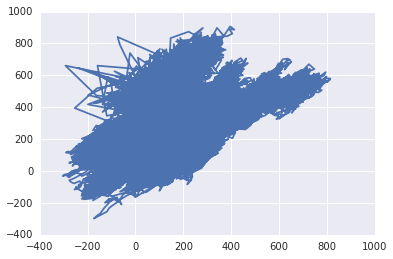

P7 vs P8


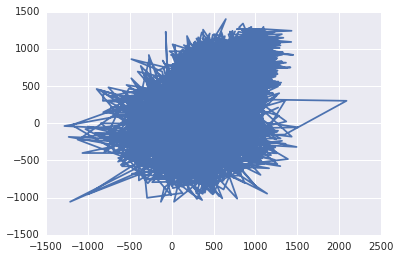

P3 vs P4


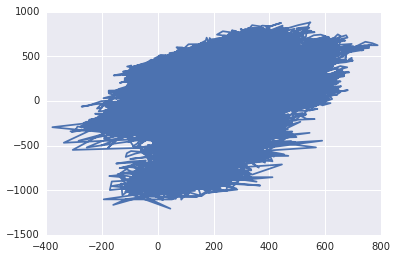

Pz vs Pz


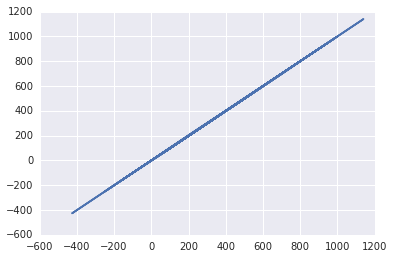

PO9 vs PO10


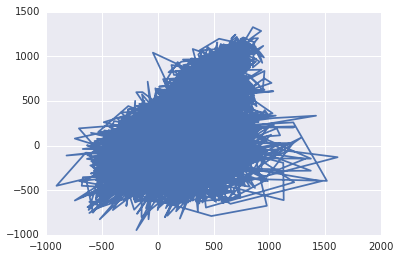

O1 vs O2


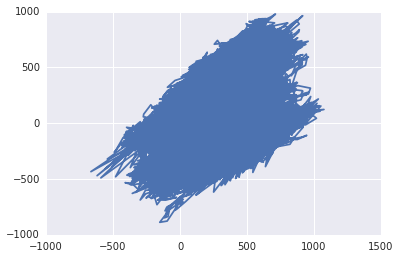

Oz vs Oz


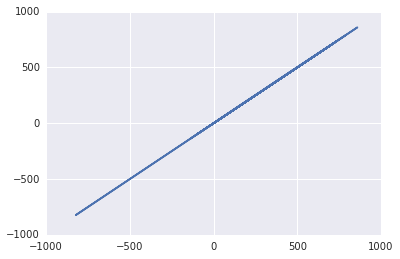

In [123]:
for left, right in mirror_pairs:
    print("{} vs {}". format(left, right))
    plt.plot(getattr(data11, left), getattr(data11, right))
    plt.show()

In [129]:
for left, right in mirror_pairs:
    print("{} vs {}". format(left, right))
    print(getattr(data11, left).corr(getattr(data11, right)))

Fp1 vs Fp2
0.867857865118
F7 vs F8
0.553119571107
F3 vs F4
0.400634641937
Fz vs Fz
1.0
FC5 vs FC6
0.0802586192125
FC1 vs FC2
0.593420109335
T7 vs T8
0.86934101138
C3 vs C4
0.64957002175
Cz vs Cz
1.0
TP9 vs TP10
0.803319670448
CP5 vs CP6
0.560797082522
CP1 vs CP2
0.639498377486
P7 vs P8
0.563669628724
P3 vs P4
0.375045201628
Pz vs Pz
1.0
PO9 vs PO10
0.626141814788
O1 vs O2
0.32751793489
Oz vs Oz
1.0


In [130]:
correlations = data11.corr()

In [137]:
correlations

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
Fp1,1.000000,0.867858,0.675580,0.553247,0.521371,0.523235,0.532336,0.442380,0.362718,0.048851,...,0.029417,0.146105,0.418826,-0.291157,-0.143853,0.288681,0.110374,-0.125155,0.023103,-0.028593
Fp2,0.867858,1.000000,0.629592,0.577022,0.524197,0.574031,0.553825,0.485268,0.255384,0.023190,...,0.010438,0.107966,0.515495,-0.323176,-0.047943,0.350764,0.047435,-0.073799,0.095540,0.037899
F7,0.675580,0.629592,1.000000,0.588146,0.570901,0.486275,0.553120,0.544152,0.338257,0.223821,...,0.403929,0.512704,0.534703,0.010677,0.273395,0.598477,0.295219,0.256233,0.337106,0.360731
F3,0.553247,0.577022,0.588146,1.000000,0.479130,0.400635,0.439942,0.568551,0.437309,0.363931,...,0.292455,0.291383,0.473842,0.024699,0.260408,0.511450,0.036668,0.271337,0.354687,0.353617
Fz,0.521371,0.524197,0.570901,0.479130,1.000000,0.582181,0.496036,0.494457,0.449608,0.394517,...,0.318489,0.411427,0.442252,0.095488,0.253866,0.472353,0.129193,0.320717,0.378484,0.391952
F4,0.523235,0.574031,0.486275,0.400635,0.582181,1.000000,0.520217,0.469524,0.083946,0.132035,...,0.107222,0.164705,0.554533,-0.147490,0.130080,0.372537,0.056996,0.088008,0.219974,0.074482
F8,0.532336,0.553825,0.553120,0.439942,0.496036,0.520217,1.000000,0.469165,0.260323,0.153896,...,0.177481,0.372610,0.585442,-0.160793,0.064789,0.441800,0.169284,0.106562,0.139628,0.255579
FC5,0.442380,0.485268,0.544152,0.568551,0.494457,0.469524,0.469165,1.000000,0.375224,0.234263,...,0.284750,0.425235,0.568995,-0.046746,0.294028,0.499646,0.211462,0.197662,0.259011,0.315142
FC1,0.362718,0.255384,0.338257,0.437309,0.449608,0.083946,0.260323,0.375224,1.000000,0.593420,...,0.339240,0.456161,0.225657,0.234436,0.091369,0.288989,0.346749,0.180401,0.300005,0.327135
FC2,0.048851,0.023190,0.223821,0.363931,0.394517,0.132035,0.153896,0.234263,0.593420,1.000000,...,0.531533,0.484251,0.117460,0.678457,0.544190,0.328458,0.196431,0.517498,0.541099,0.507195


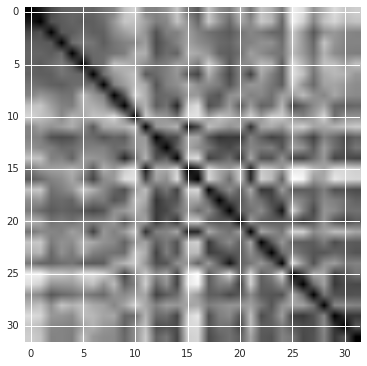

In [136]:
plt.imshow(correlations)

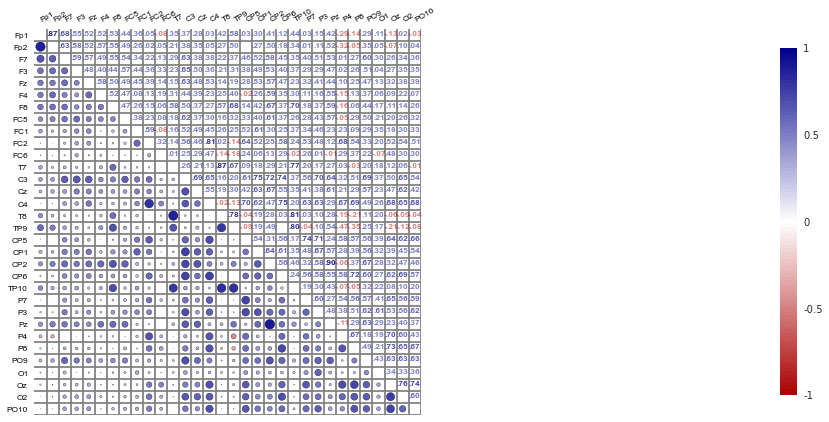

In [142]:
from biokit.viz import corrplot
c = corrplot.Corrplot(correlations)
c.plot(lower='circle', upper='text', shrink=.9)

http://thomas-cokelaer.info/blog/2014/10/corrplot-function-in-python/
http://nbviewer.ipython.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb